In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("C:/Users/LENOVO/Downloads/aqi_data.csv")  # put your actual CSV filename here

# Check first few rows
print(df.head())

# Save as a pickle file
df.to_pickle("filteredDataAQ.pkl")

print("Pickle file created successfully!")


   PM2.5  PM10  NO2  NH3  SO2  CO  AQI        datetime  Year  Month  Day  \
0     68    64   17    4   28  31   68  1/3/2020 10:00  2020      1    3   
1     67    70   23    2   13  49   77  1/3/2020 10:00  2020      1    3   
2     32    64   26    5    6  19   32  1/3/2020 10:00  2020      1    3   
3     93    93   31    3    9  57   93  1/3/2020 10:00  2020      1    3   
4     60    55   20    5   18  29   60   1/5/2020 6:00  2020      1    5   

  Weekday  Hour  TEMPERATURE  ALTITUDE  HUMIDITY  
0  Friday    10           26        76        52  
1  Friday    10           39       115        54  
2  Friday    10           34       153        88  
3  Friday    10           30       405        79  
4  Sunday     6           27       102        72  
Pickle file created successfully!


In [3]:
df=pd.read_pickle("filteredDataAQ.pkl")
df.head()


,PM2.5,PM10,NO2,NH3,SO2,CO,AQI,datetime,Year,Month,Day,Weekday,Hour,TEMPERATURE,ALTITUDE,HUMIDITY
0,68,64,17,4,28,31,68,1/3/2020 10:00,2020,1,3,Friday,10,26,76,52
1,67,70,23,2,13,49,77,1/3/2020 10:00,2020,1,3,Friday,10,39,115,54
2,32,64,26,5,6,19,32,1/3/2020 10:00,2020,1,3,Friday,10,34,153,88
3,93,93,31,3,9,57,93,1/3/2020 10:00,2020,1,3,Friday,10,30,405,79
4,60,55,20,5,18,29,60,1/5/2020 6:00,2020,1,5,Sunday,6,27,102,72


In [4]:
df.values

array([[68, 64, 17, ..., 26, 76, 52],
       [67, 70, 23, ..., 39, 115, 54],
       [32, 64, 26, ..., 34, 153, 88],
       ...,
       [162, 136, 43, ..., 28, 261, 67],
       [213, 152, 55, ..., 32, 166, 80],
       [199, 166, 60, ..., 20, 435, 65]], shape=(1565, 16), dtype=object)

In [5]:
import pandas as pd

# Load CSV
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\aqi_data.csv")  # use raw string to avoid \U issue

# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract numeric features
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['Day'] = df['datetime'].dt.day
df['Hour'] = df['datetime'].dt.hour
df['Weekday'] = df['datetime'].dt.weekday  # Monday=0, Sunday=6

# Optionally drop the original datetime column
df = df.drop(columns=['datetime'])

print(df.head())


   PM2.5  PM10  NO2  NH3  SO2  CO  AQI  Year  Month  Day  Weekday  Hour  \
0     68    64   17    4   28  31   68  2020      1    3        4    10   
1     67    70   23    2   13  49   77  2020      1    3        4    10   
2     32    64   26    5    6  19   32  2020      1    3        4    10   
3     93    93   31    3    9  57   93  2020      1    3        4    10   
4     60    55   20    5   18  29   60  2020      1    5        6     6   

   TEMPERATURE  ALTITUDE  HUMIDITY  
0           26        76        52  
1           39       115        54  
2           34       153        88  
3           30       405        79  
4           27       102        72  


In [6]:
X=df.drop("AQI",axis=1)
Y=df["AQI"]
n=df.shape[0]
n=int (n*0.65)
train_x=X[:n-1]
test_x=X[n-1:-1]
train_y=Y[1:n]
test_y=Y[n:]

#train_x=train_x.astype(int)
#test_x=test_x.astype(int)
train_y=train_y.astype(int)
test_y=test_y.astype(int)

### Logistic Regression

In [7]:
model=LogisticRegression()
model.fit(train_x,train_y)
p=model.predict(test_x)
acc_log= round(model.score(train_x,train_y) * 100, 2)
acc_logP= round(model.score(test_x,test_y) * 100, 2)
p

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([189, 238, 115, 239, 189, 123, 141,  84, 238, 189, 178,  88,  92,
        69, 141, 178, 141, 366, 141, 306, 141, 303, 141, 315, 141, 315,
       141, 323,  96,  69, 189, 123,  69, 189, 189, 189, 189,  69,  96,
        69,  69, 306, 141, 189,  54,  69,  69, 112,  69, 189,  62,  80,
        69,  69,  96,  69, 102, 189,  69,  80,  69,  64,  69,  96,  69,
        96,  69,  69,  43,  70,  69,  69,  54,  69,  54,  69,  69,  88,
        96,  69,  69,  96,  62,  50,  69,  61,  69,  69,  69,  96,  69,
        69,  96,  84, 306, 123, 123, 123, 189, 189, 189, 115, 189,  69,
       306, 123, 189, 189, 366, 189, 189, 141,  84,  69, 306, 123, 103,
       123, 366,  69,  96,  96,  69,  69, 306, 123, 103, 123, 141,  84,
        96, 141,  69,  96, 306, 123, 123, 123, 141,  69,  84, 124,  96,
       102, 306, 123, 123, 123, 141,  69,  69, 115, 123,  69, 178,  61,
       123, 123, 115,  84,  96, 141, 123,  54, 178,  54, 123, 103, 183,
        96,  84,  96,  69,  69,  43,  69,  69,  43,  70,  43,  6

### KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(train_x,train_y)  
Y_pred = knn.predict(test_x)  
acc_knn = round(knn.score(train_x,train_y) * 100, 2)  
acc_knnP = round(knn.score(test_x,test_y) * 100, 2)
Y_pred

array([146, 145, 121, 139,  65,  76, 107,  86,  76, 123, 110,  64,  89,
        66, 144,  55,  31, 177, 151, 332,  48, 315,  69, 147,  92, 302,
        83, 329, 121,  81,  76,  69,  60, 122, 189,  66, 151,  88, 132,
        29,  64, 211,  79,  54,  34,  54, 107,  78,  50,  66,  78,  96,
        76,  29, 131, 110,  43,  85,  76,  61,  55,  45,  94,  30,  93,
        69,  80,  82,  43,  46,  79,  29,  34,  34,  69,  49,  31,  54,
        34,  31,  67,  31,  55,  50,  64,  47, 110,  64,  65,  80,  44,
        79,  60, 112, 241,  55, 123,  85, 189, 103,  54, 100,  66,  94,
       303,  57, 147, 139, 106, 192, 110,  76,  29,  78, 123, 103,  86,
        78, 149,  93,  63,  63,  51,  65, 228,  78,  86,  68, 106,  65,
        63, 189,  94,  82, 222,  78, 115, 149, 141,  32,  77, 119,  60,
        69, 123,  69, 107, 103, 189,  94,  79,  82,  76,  50,  66,  65,
       134, 107, 156,  77,  63, 100,  69,  50, 104,  30,  76,  87,  86,
        96,  77,  60,  62,  30,  41,  41,  55,  51,  43,  72,  4

### Random Forest

In [9]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x,train_y)

Y_prediction = random_forest.predict(test_x)

acc_random_forest = round(random_forest.score(train_x,train_y) * 100, 2)
acc_random_forestP = round(random_forest.score(test_x,test_y) * 100, 2)
Y_prediction

array([146, 201, 220, 220, 141, 109,  43, 148, 141, 228, 104,  88, 104,
        50, 189,  31, 189,  31, 189, 147, 189, 147, 189, 153, 189, 175,
       189, 174, 250,  60, 186, 186,  98, 189, 146, 188, 100, 169, 180,
       153, 105, 306, 161, 121,  69, 107, 100,  94,  69, 145,  89,  69,
        69,  93,  92,  95,  43, 113, 130,  69,  69,  69,  92,  31,  43,
        69,  89, 106,  43,  69, 153,  94,  69,  96,  82,  61,  62,  62,
       200,  31,  44,  31,  79, 114,  62, 102, 107,  94,  69,  31,  75,
       188,  60, 136, 327, 130, 239, 105, 141, 114, 129,  76, 273, 105,
       323, 167, 161, 189, 214,  79, 103, 189,  93,  89, 306, 165, 125,
       123, 112, 168,  96,  54, 165, 114, 306,  89, 128, 157, 151, 114,
        92, 115, 165,  87, 306,  87, 177, 189, 216,  77, 167, 125,  63,
       114, 211,  63, 122, 189, 139,  98,  60, 181, 141, 114, 178,  62,
        66, 189, 141, 119, 290, 139, 105, 114, 169,  89, 103, 189, 121,
        96,  43, 115,  55, 189,  41,  64, 105,  41,  43,  41, 18

### Decision Tree

In [10]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(train_x,train_y)  
Y_pred2 = decision_tree.predict(test_x)  
acc_decision_tree = round(decision_tree.score(train_x,train_y) * 100, 2)  
acc_decision_treeP = round(decision_tree.score(test_x,test_y) * 100, 2)
Y_pred2

array([146, 201,  85,  85,  85,  80,  49, 148, 139, 164, 115,  88, 110,
       141, 189, 105, 189, 105, 189, 105, 189, 147, 189, 153, 189, 302,
       189, 302, 225, 348, 161, 192, 175, 123, 192, 146, 100,  86, 111,
       182,  97, 123,  94, 192,  78,  93, 111,  96,  62, 276,  69,  76,
        66,  93, 111,  84,  43,  66,  89,  61,  69,  55,  92,  84,  43,
        78,  69,  76,  30,  54,  92,  96,  43,  30, 130,  60,  69,  98,
       182,  81,  49, 109, 164,  91, 139,  77, 182,  81,  49, 112,  80,
        91, 348, 197, 241,  50, 239, 149, 119, 156, 146, 111, 143, 202,
       123, 147,  54,  86, 203, 144, 111, 261, 103,  89, 105,  65, 232,
       310, 112, 168, 168, 261, 165, 114, 316,  64, 125, 310, 151, 167,
       168, 261, 103,  89, 316,  64, 198, 107, 223, 103, 168, 115,  92,
       130, 316, 114, 239, 310, 395, 103, 100, 115, 182, 130, 282, 107,
       310, 251, 220, 303, 111, 103, 114, 114, 282,  55,  68, 251, 234,
       108, 111, 103,  54, 189,  68, 164,  82,  76,  80,  76, 15

### 'Support Vector Machines

In [11]:
linear_svc = LinearSVC()
linear_svc.fit(train_x,train_y)

Y_pred3 = linear_svc.predict(test_x)

acc_linear_svc = round(linear_svc.score(train_x,train_y) * 100, 2)
acc_linear_svcP = round(linear_svc.score(test_x,test_y) * 100, 2)
Y_pred3

array([102, 190, 132, 291, 306,  89,  49, 126, 253, 214, 178,  88, 148,
        64, 181, 121,  43, 120, 189, 177,  64, 177,  64, 217, 111, 441,
       189, 285,  69,  81,  98,  51,  98, 186,  76, 366, 100, 105, 189,
       100, 189, 204, 110, 213,  69,  43,  69,  29,  43, 106, 152, 210,
        99,  99,  69,  83, 102, 102,  69,  50, 176,  64, 114,  30,  58,
        30,  97, 176, 197,  64,  85,  29, 129,  69,  48, 213,  69,  81,
       220,  31, 202, 111, 234, 210,  69,  35, 107,  31, 159, 108,  69,
        62, 189, 130, 276, 123, 123, 123, 152,  76, 345, 189, 189, 105,
       323, 189, 189, 189, 323, 105, 100, 189, 126, 123, 106, 123, 128,
        90, 297,  93,  69, 125, 189, 123, 258, 123, 123, 189, 350, 123,
        78, 189, 189,  30, 178, 123, 123,  64, 350, 123,  69,  64, 189,
       231, 178, 167,  92,  64, 119,  46,  46,  64, 189, 145, 178,  62,
       123, 209, 284, 154,  45, 189, 189,  62, 178,  75, 135, 189, 306,
       121, 193, 111,  71,  64,  67,  67,  67,  67, 234,  67,  6

### RESULT

In [12]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Train_Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest,acc_decision_tree],
    'Test_Score': [acc_linear_svcP, acc_knnP, acc_logP, 
              acc_random_forestP,acc_decision_treeP]})
result_df = results.sort_values(by='Test_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Train_Score,Test_Score
Model,,
Support Vector Machines,35.93,0.55
KNN,35.04,0.55
Logistic Regression,9.45,0.55
Decision Tree,100.00,0.55
Random Forest,100.00,0.36


### Evaluation

In [30]:
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap="Blues", values_format="d")
# plt.title("SVM Confusion Matrix")
# plt.show()

In [31]:
# KNN
#plot_confusion_matrix(knn,test_x,test_y)
print('LG Confusion Matrix')

LG Confusion Matrix


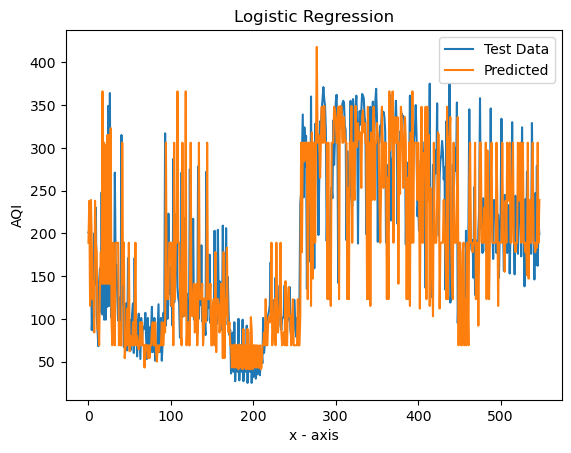

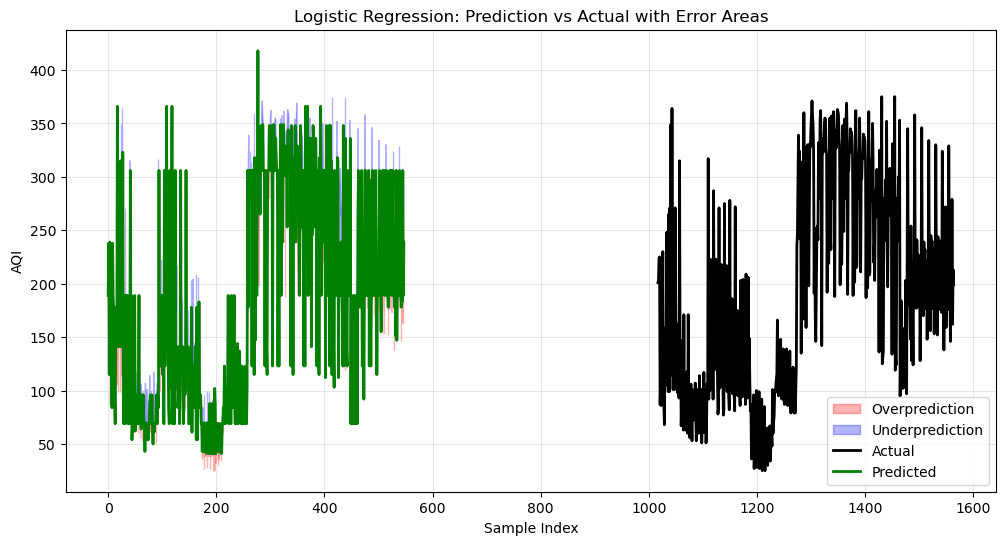

In [17]:
# Logistic Regression  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), p,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Logistic Regression')
plt.legend()
plt.show() 

# Simple alternative 1: Area plot
plt.figure(figsize=(12, 6))
plt.fill_between(range(len(test_y)), test_y, p, where=(p >= test_y), 
                 color='red', alpha=0.3, label='Overprediction')
plt.fill_between(range(len(test_y)), test_y, p, where=(p <= test_y), 
                 color='blue', alpha=0.3, label='Underprediction')
plt.plot(test_y, label='Actual', color='black', linewidth=2)
plt.plot(p, label='Predicted', color='green', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.title('Logistic Regression: Prediction vs Actual with Error Areas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

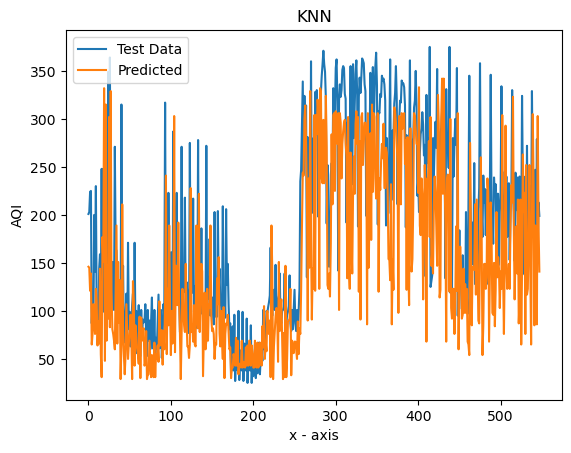

In [18]:
# KNN  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('KNN')
plt.legend()
plt.show() 

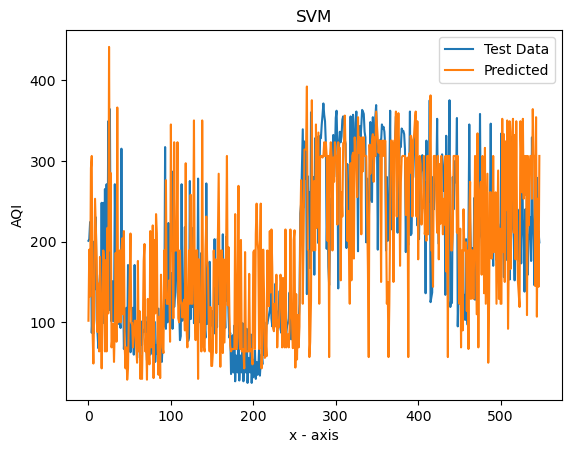

In [19]:
# SVM  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred3,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('SVM')
plt.legend()
plt.show() 

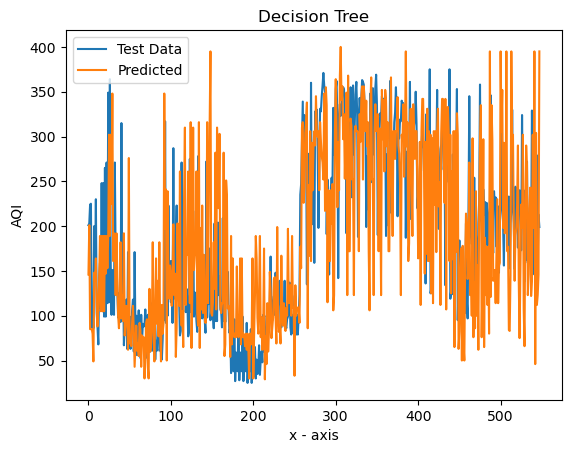

In [20]:
# Dession Tree  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred2,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Decision Tree')
plt.legend()
plt.show() 

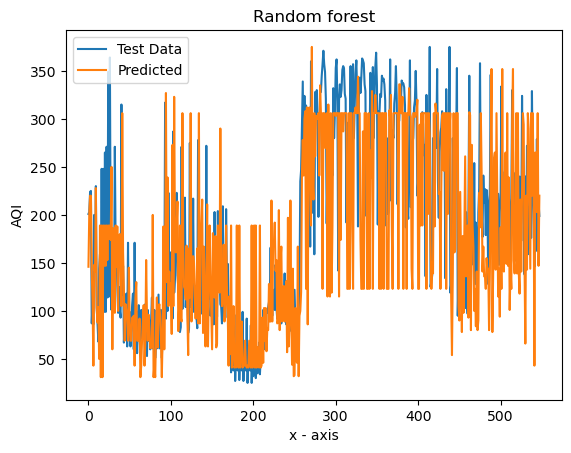

In [21]:
# Random Forest 
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_prediction,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Random forest')
plt.legend()
plt.show() 

In [22]:
# Serialize mlp_nn object into a file called mlp_nn.pkg on disk using pickle
import pickle
with open('decisionTree.pkl', 'wb') as handle:
    pickle.dump(decision_tree, handle, pickle.HIGHEST_PROTOCOL)
    

In [23]:
# de-serialize mlp_nn.pkl file into an object called mlp_nn using pickle
with open('decisionTree.pkl', 'rb') as handle:
    aqiModel = pickle.load(handle) 

In [24]:
test_x

,PM2.5,PM10,NO2,NH3,SO2,CO,Year,Month,Day,Weekday,Hour,TEMPERATURE,ALTITUDE,HUMIDITY
1016,155,122,34,5,10,56,2020,1,7,1,3,36,50,84
1017,187,201,113,12,8,45,2020,1,7,1,3,39,490,39
1018,203,148,24,4,10,87,2020,1,7,1,3,28,441,76
1019,224,176,57,2,8,77,2020,1,7,1,3,36,260,52
1020,225,139,40,4,13,59,2020,1,7,1,3,39,260,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,247,167,67,5,12,43,2020,1,7,1,3,21,41,33
1560,163,142,57,7,10,39,2020,1,7,1,3,20,499,57
1561,279,215,78,11,23,31,2020,1,7,1,3,20,226,41
1562,162,136,43,4,16,34,2020,1,7,1,3,28,261,67
